# Polynomial Regression, Regularization with Lasso and Ridge Regression

<b>Goals</b>

- Polynomial, Lasso, and Ridge regression. How they work and how to use them.
- The concept of Regularization. Why it's used and how it relates to the external bias vs variance problem.

## Polynomial regression

So far we've only tried to create regression models that are linear functions of the predictor variables.  However, there's no reason we can't transform the predictor variables by any type of function we want before inputting them to linear regression.  This is the idea behind [**Polynomial Regression**](https://en.wikipedia.org/wiki/Polynomial_regression) and it allows us (along with similar functional regressions) to essentially model our response variables as any function of our predictor variables that we like.  Viewed in this way, Linear Regression is just a special instance of Polynomial Regression with a polynomial of degree 1.

We're going to use polynomial terms (squares, cubes, etc..) on a regression equation for the purpose of fitting non-linear data, which is data cannot be fit using a least squares model.

![formula](http://www.statisticshowto.com/wp-content/uploads/2015/01/excel-polynomial-regression.png)




#### Polynomial Regression with sklearn
sklearn has built-in options for converting your predictor variables to polynomial functions of them.  In this exercise we'll use the [**PolynomialFeatures**](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class of sklearn to manipulate incoming predictors into nth-order polynomials of those features.  

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score;

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


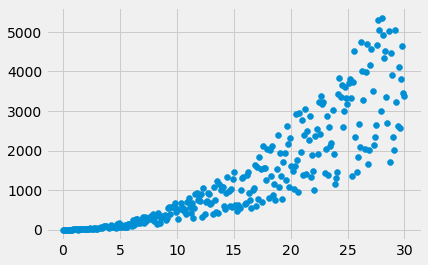

In [9]:
#Make random data to plot
#Input variable of 300 numbers from 0 to 30
X = np.linspace(0, 30, 300)
#Square x and assign it to y
y = (X**2)
#Throw in some randomness into y
y = y*(np.random.rand(300)*5+ 2)
#plt x and y
plt.style.use('fivethirtyeight')
plt.scatter(X, y)
plt.show()

Our data is clearly non linear but let's go ahead fit a linear model on it.

In [6]:
X

array([  0.        ,   0.10033445,   0.2006689 ,   0.30100334,
         0.40133779,   0.50167224,   0.60200669,   0.70234114,
         0.80267559,   0.90301003,   1.00334448,   1.10367893,
         1.20401338,   1.30434783,   1.40468227,   1.50501672,
         1.60535117,   1.70568562,   1.80602007,   1.90635452,
         2.00668896,   2.10702341,   2.20735786,   2.30769231,
         2.40802676,   2.5083612 ,   2.60869565,   2.7090301 ,
         2.80936455,   2.909699  ,   3.01003344,   3.11036789,
         3.21070234,   3.31103679,   3.41137124,   3.51170569,
         3.61204013,   3.71237458,   3.81270903,   3.91304348,
         4.01337793,   4.11371237,   4.21404682,   4.31438127,
         4.41471572,   4.51505017,   4.61538462,   4.71571906,
         4.81605351,   4.91638796,   5.01672241,   5.11705686,
         5.2173913 ,   5.31772575,   5.4180602 ,   5.51839465,
         5.6187291 ,   5.71906355,   5.81939799,   5.91973244,
         6.02006689,   6.12040134,   6.22073579,   6.32

In [7]:
X.reshape(-1,1)

array([[  0.        ],
       [  0.10033445],
       [  0.2006689 ],
       [  0.30100334],
       [  0.40133779],
       [  0.50167224],
       [  0.60200669],
       [  0.70234114],
       [  0.80267559],
       [  0.90301003],
       [  1.00334448],
       [  1.10367893],
       [  1.20401338],
       [  1.30434783],
       [  1.40468227],
       [  1.50501672],
       [  1.60535117],
       [  1.70568562],
       [  1.80602007],
       [  1.90635452],
       [  2.00668896],
       [  2.10702341],
       [  2.20735786],
       [  2.30769231],
       [  2.40802676],
       [  2.5083612 ],
       [  2.60869565],
       [  2.7090301 ],
       [  2.80936455],
       [  2.909699  ],
       [  3.01003344],
       [  3.11036789],
       [  3.21070234],
       [  3.31103679],
       [  3.41137124],
       [  3.51170569],
       [  3.61204013],
       [  3.71237458],
       [  3.81270903],
       [  3.91304348],
       [  4.01337793],
       [  4.11371237],
       [  4.21404682],
       [  4

0.755885506743


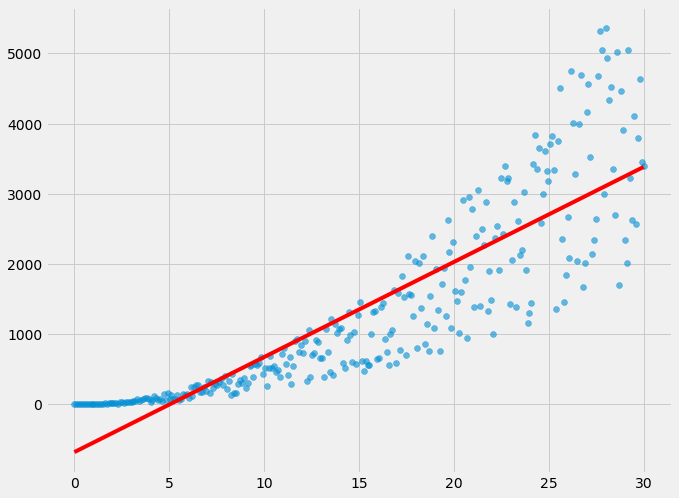

In [11]:
#Reshape X
X = X.reshape(-1, 1)

#Intialize linear regression model
lr = LinearRegression()
#Fit model
lr.fit(X,y)

#Make predictions
preds = lr.predict(X)

#Print score
print(lr.score(X,y))
print 
#plot data and predictions
plt.figure(figsize=(10, 8))
plt.scatter(X, y, alpha=.6)
plt.plot(X, preds, "r", linewidth = 4)
plt.show()

How good is the fit?

Let's use polynomial regression to model this.

In [12]:
#Intialize Polynomial Features object with degree = 2
poly = PolynomialFeatures(2)

x = np.linspace(0,30,300)

#fit and transform Polynomial object on data, set equal to X2
X2 = poly.fit_transform(X)

In [13]:
#X2 shape
X2.shape

(300, 3)

In [22]:
#Look at first column
X2[:,0][:10]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [23]:
#Look at second column
X2[:,1][:10]

array([ 0.        ,  0.10033445,  0.2006689 ,  0.30100334,  0.40133779,
        0.50167224,  0.60200669,  0.70234114,  0.80267559,  0.90301003])

In [24]:
#Look at third column
X2[:,2][:20]

array([ 0.        ,  0.010067  ,  0.04026801,  0.09060301,  0.16107202,
        0.25167504,  0.36241205,  0.49328307,  0.6442881 ,  0.81542712,
        1.00670015,  1.21810718,  1.44964821,  1.70132325,  1.97313229,
        2.26507533,  2.57715238,  2.90936343,  3.26170848,  3.63418754])

What do you see?

The first column is an intercept, the second is the original, and the third is the transformed column.

Now let's throw this into our model.

In [18]:
#Intialize model
lr=LinearRegression()

#fit model on X2 
lr.fit(X2,y)

#Make predictions
preds = lr.predict(X2)

#Score model
lr.score(X2,y)


0.8084223278527658

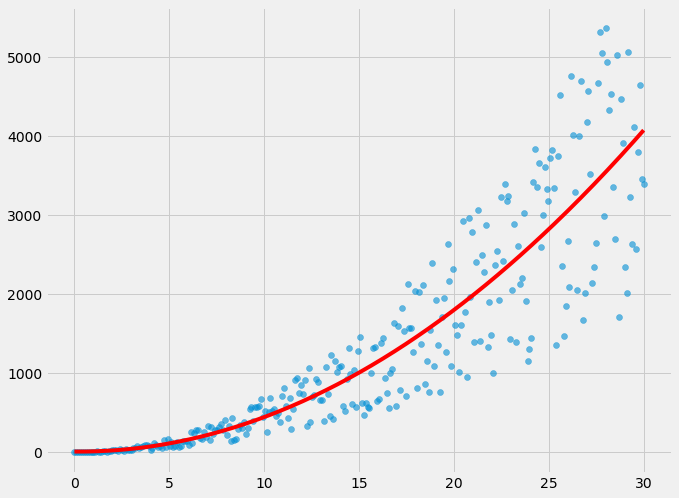

In [19]:
#Plot data and predictions

plt.figure(figsize=(10, 8))
#Plot the original X data versus
plt.scatter(X,y,alpha=0.6)
#Plot line plot of X and the new predictions
plt.plot(X,preds,"r",linewidth=4)

Voila, here's our polynomial regression plot.

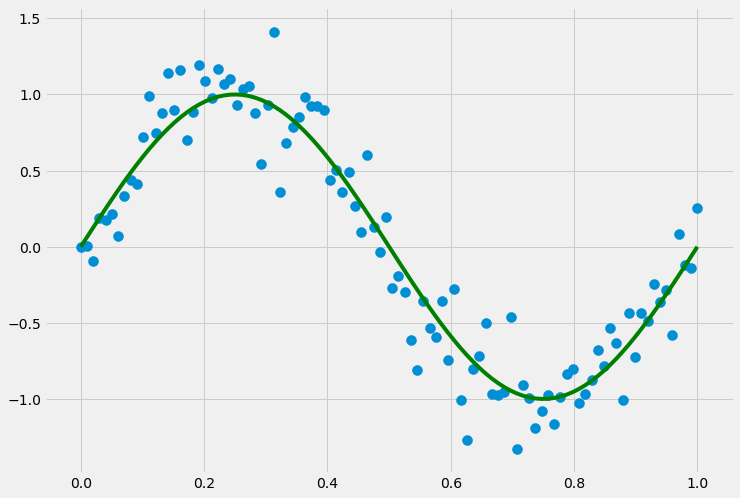

In [26]:

#Set random seeed
np.random.seed(9)

# Function that returns the sin(2*pi*x)
def f(x):
    return np.sin(2 * np.pi * x)

# This returns 100 evenly spaced numbers from 0 to 1
X = np.linspace(0,1,100)

n_samples = 100

#Pass X into f and add random data to jitter data
y = f(X) + np.random.normal(scale=0.2,size=n_samples)

#Make "predictions" set equal to curve
curve = f(X)

# Plot the training data against what we know to be the ground truth sin function
plt.figure(figsize=(11, 8))
plt.plot(X,curve,color="green")
plt.scatter(X,y,s=100)
plt.show()

### Fitting an nth-degree Polynomial
Now that we have our data and know the ground truth, let's try fitting a 3rd degree polynomial to our training data and see how it looks.  3rd degree makes sense for this interval because the sin function has 2 turning points over the interval [0,1] and a 3rd degree polynomial will general have 2 (or less) turning points.

We'll combine the PolynomialFeatures function with the [make_pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) function to string together a pipeline of operations that is able to first transform our linear features into polynomial features and then run a linear regression against the resulting polynomial features. 

In [27]:

#Assign a variable pip to make_pipeline function that tkes in Polynom and Linreg objects
#Specify degree = 3
pipe = make_pipeline(PolynomialFeatures(3), LinearRegression())

#Reshape X
Xrs = X.reshape(-1,1)
#fit pipe object on X and y
pipe.fit(Xrs, y)
#Make predictions
preds = pipe.predict(Xrs)

No handles with labels found to put in legend.


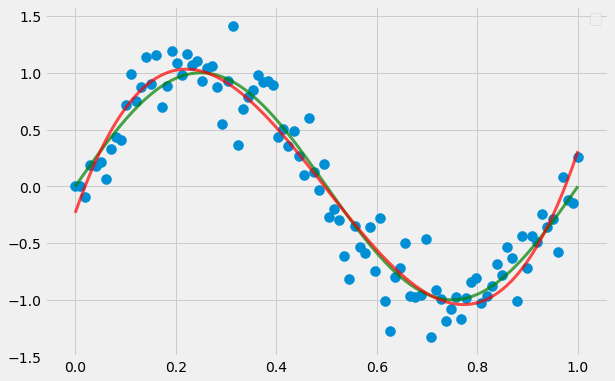

In [28]:
#Set size
plt.figure(figsize=(9, 6))
#Plot curve line
plt.plot(X, curve, linewidth = 3,color = "green", alpha = 0.7)
#Scatter plot of data
plt.scatter(X, y, s=100)
#Plot predictions from pipe
plt.plot(X, preds, linewidth = 3, color = "red", alpha = 0.7)
plt.legend()
plt.show()

What do you make of the fit?

The previous code in function form

In [30]:
def polynomial_ploting(X, y, degree):
    pipe = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    #Reshape X
    Xrs = X.reshape(-1, 1)
    #fit pipe object on X and y
    pipe.fit(Xrs, y)
    preds = pipe.predict(Xrs)
    print ("R2 score is", pipe.score(Xrs, y))
    plt.figure(figsize=(9, 6))
    #Plot curve line
    plt.plot(X, curve, label='Curve Line', linewidth = 3, color='green')
    #Scatter plot of data
    plt.scatter(X, y, label='data', s=100)
    #Plot predictions from pipe
    plt.plot(X, preds,label= "Predicted Line with {} degrees".format(degree),
             linewidth = 3, color= "red")
    plt.legend()
    plt.show()

R2 score is 0.512973261073


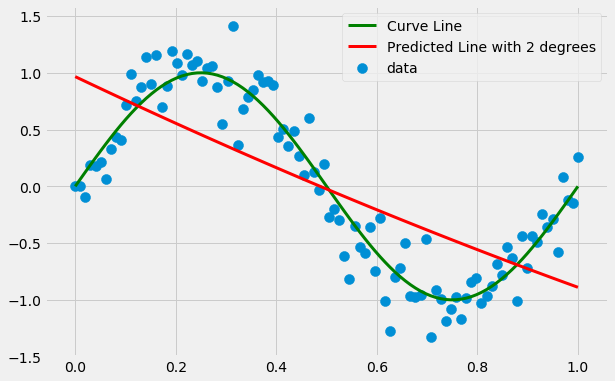

In [37]:
#Plot with 2 degrees
polynomial_ploting(X,y,2)

R2 score is 0.92860934462


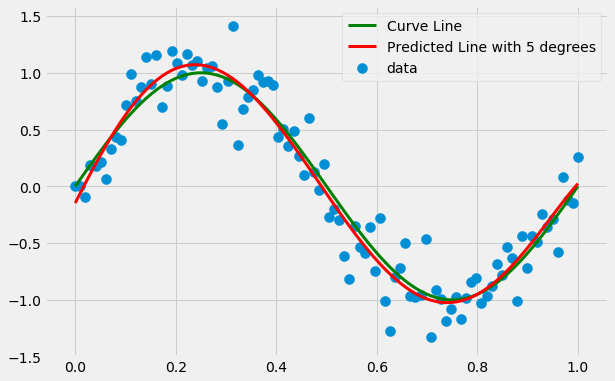

In [38]:
#Plot with 5 degrees
polynomial_ploting(X,y,5)

R2 score is 0.933575229923


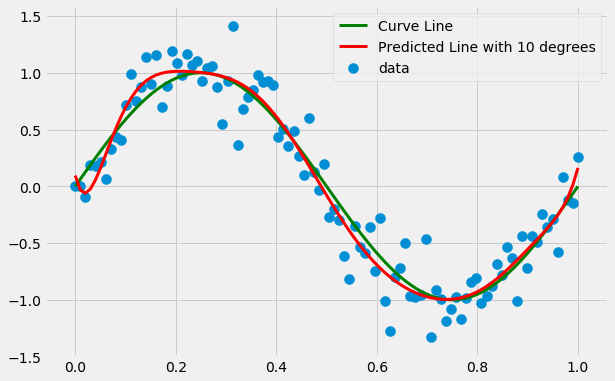

In [41]:
#Give me a value
polynomial_ploting(X,y,10)

In [ ]:
#Give me another one but higher


In [ ]:
#One last one


### What do you notice happens when we increase our degrees?

As the polynomial degree increase so does the overfitting of the model.

![overfit](reg_overfit.png)


## Regularization

In simple terms it is the penalty on a model's complexity. Regularization helps prevent overfitting by penalizing large coefficients.

- If your model is very complex (i.e., lots of features, large features, high degree polynomial fit, etc.), you need to worry more about overfitting.
- Increasing model complexity leads multicolinearity because OLS-derived coefficients become increasingly large. This is a sign that the model is incorporating too much variance from the dataset aka <b>Overfitting</b>
- The example below uses the same dataset as above, but with fewer samples, and a relatively high degree model.
- Ridge and Lasso regression are two different regularization models.


![a](https://image.slidesharecdn.com/ch-4-demand-estimation2-110225045402-phpapp01/95/ch-4demandestimation2-11-728.jpg?cb=1298609672)

<b>Ridge</b>: It's function is the standard OLS function plus the squared value of each coefficient multipled by a constant/parameter (alpha) determined by you the data scientist. Similar to picking a K in a KNN model. 0 alpha equals OLS, very high alpha equals underfitting. Aka L2 regularization.
![ridge](ridge.png)

The alpha or $\lambda$ can take any value greater than 0. Best way to choose an optimal regularization parameter is with cross-validation.

<b>Lasso</b>: OLS function plus the sum of the absolute values of each coefficient. Has an advantage over Ridge because it's great for feature selection because it shrinks values of insignificant features to 0. Aka L1 regularization.
![e](lasso.png)

Ridge is better for dealing with multicollinearity and Lasso is better for high number of features.

In [42]:
#Load in boston dataset
from sklearn.datasets import load_boston
boston = load_boston()
#Turn into pandas dataframe
df = pd.DataFrame(boston["data"])
df.columns = boston["feature_names"]
df["MEDV"] = boston["target"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
#Look at the data dictionary
boston["DESCR"].split("\n")

['Boston House Prices dataset',
 '===========================',
 '',
 'Notes',
 '------',
 'Data Set Characteristics:  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive',
 '    ',
 '    :Median Value (attribute 14) is usually the target',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial high

In [44]:
#Assign X and y

X = df.drop("MEDV", axis =1)
y = df.MEDV

In [45]:
#Fit and score a linear regression model

lr = LinearRegression()
lr.fit(X, y)
lr.score(X ,y)

0.7406077428649428

In [49]:
#Fit and score a ridge regression model with alpha = 0.4
rid = Ridge(alpha=100) # alpha - how much penality we are adding
rid.fit(X,y)
rid.score(X,y)


0.71781243856776999

In [50]:
#Fit and score a lasso regression model with alpha = 0.4
las = Lasso(alpha=1)
las.fit(X,y)
las.score(X,y)


0.682549461750665

What do we make of these results? How do the regularized models compare to the linear one?

Let's examine the best features using lasso regression

In [51]:
#Assign the lasso coefficients to coef variable
coef = las.coef_
coef

array([-0.06342255,  0.04916867, -0.        ,  0.        , -0.        ,
        0.94678567,  0.02092737, -0.66900864,  0.26417501, -0.01520915,
       -0.72319901,  0.00829117, -0.76143296])

In [52]:
#Zip column names and coef
dict(zip(X.columns,coef))

{'AGE': 0.020927367934403522,
 'B': 0.0082911659531985024,
 'CHAS': 0.0,
 'CRIM': -0.06342254548584686,
 'DIS': -0.66900863855525161,
 'INDUS': -0.0,
 'LSTAT': -0.76143295742591599,
 'NOX': -0.0,
 'PTRATIO': -0.72319901352234395,
 'RAD': 0.2641750060838971,
 'RM': 0.94678566695975275,
 'TAX': -0.015209151400103539,
 'ZN': 0.049168668690269111}

Lasso assigns a 0 to features it thinks are useless, so what matters is the magnitude and not the direction of the feature coefficient.

Now time to cross-validate with the three models.

In [53]:
#Use cross_val_score function on linear regression and set scoring = r2
cross_val_score(LinearRegression(), X, y, cv = 5, scoring = "r2").mean()

0.35074135093252384

In [54]:
#Use cross_val_score function on ridge regression with alpha = 100 and set scoring = r2
cross_val_score(Ridge(100),X,y,cv=5, scoring="r2").mean()

0.49254428000333483

In [55]:
#Use cross_val_score function on lasso regression with alpha = 1 and set scoring = r2
cross_val_score(Lasso(1),X,y,cv=5,scoring="r2").mean()

0.43176891192320477

How do the cross-validated scores of the Lasso/Ridge regressions compare to that of Linear regression?

Let's try this exercise again but with the polynomial transformed features.

In [56]:
#Transform the features to 2-degrees
poly = PolynomialFeatures(2)
Xp = poly.fit_transform(X)

In [57]:
#Fit linear regression model on the Xp features and evaluate it on itself
lr = LinearRegression()
lr.fit(Xp, y)
lr.score(Xp, y)

0.91247702819252174

In [58]:
#Fit Ridge regression model with 1500000 alpha on the Xp features and evaluate it on itself
rid = Ridge(1500000) # huge alpha coz we are using polynomial and huge coeff so we need huge value to penalize it
rid.fit(Xp, y)
rid.score(Xp, y)

0.83950793908215537

In [59]:
#Fit Lasso regression model with 50 alpha on the Xp features and evaluate it on itself
las = Lasso(50)
las.fit(Xp, y)
las.score(Xp, y)

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.82025648565609366

How do the Ridge & Lasso scores compare to that of the Linear score?

Cross-validation time.

In [60]:
#Linear regression cross-validation
cross_val_score(LinearRegression(), Xp, y, cv = 5, scoring = "r2").mean()

-7.0665738944376271

In [ ]:
cross_val_score(Ridge())

What does a negative r-squared score mean?

In [61]:
#Ridge regression cross-validation
cross_val_score(Ridge(1500000),Xp,y,cv=5,scoring="r2").mean()

0.43321638690196507

In [62]:
#Lasso regression cross-validation
cross_val_score(Lasso(50),Xp,y,cv=5,scoring="r2").mean()

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

0.43768400860363882

**We've cross-validated six different data and algorithm combinations. What have we learned from this part?**

**Class exercise:** 


- We're going to find the best alpha values for both ridge and lasso models trained on polynomial-transformed features.

- I want you plot a range of alpha values versus the cross validated r-squared scores aka a validation curve.


Ridge

In [64]:
# Pre-defined ridge_alphas
ridge_alphas = np.logspace(3, 7, 200)
ridge_alphas

array([  1.00000000e+03,   1.04737090e+03,   1.09698580e+03,
         1.14895100e+03,   1.20337784e+03,   1.26038293e+03,
         1.32008840e+03,   1.38262217e+03,   1.44811823e+03,
         1.51671689e+03,   1.58856513e+03,   1.66381689e+03,
         1.74263339e+03,   1.82518349e+03,   1.91164408e+03,
         2.00220037e+03,   2.09704640e+03,   2.19638537e+03,
         2.30043012e+03,   2.40940356e+03,   2.52353917e+03,
         2.64308149e+03,   2.76828663e+03,   2.89942285e+03,
         3.03677112e+03,   3.18062569e+03,   3.33129479e+03,
         3.48910121e+03,   3.65438307e+03,   3.82749448e+03,
         4.00880633e+03,   4.19870708e+03,   4.39760361e+03,
         4.60592204e+03,   4.82410870e+03,   5.05263107e+03,
         5.29197874e+03,   5.54266452e+03,   5.80522552e+03,
         6.08022426e+03,   6.36824994e+03,   6.66991966e+03,
         6.98587975e+03,   7.31680714e+03,   7.66341087e+03,
         8.02643352e+03,   8.40665289e+03,   8.80488358e+03,
         9.22197882e+03,

In [66]:
#Answer
result = []
for i in ridge_alphas:
    r_score = cross_val_score(Ridge(i),Xp,y,cv=5,scoring="r2").mean()
    result.append(r_score)
print(result)


[-2.5165956955883977, -2.4891200662435145, -2.4618301339648716, -2.4347333017481612, -2.4078366921747274, -2.3811471764576693, -2.3546714019229302, -2.328415817437679, -2.3023866963969177, -2.2765901569157583, -2.2510321790005405, -2.2257186184469746, -2.2006552174038654, -2.1758476115285603, -2.1513013337711846, -2.1270218148938786, -2.1030143808734612, -2.079284247399483, -2.0558365117405302, -2.032676142231856, -2.0098079657814947, -1.9872366536406869, -1.9649667058416811, -1.9430024346412231, -1.9213479472665789, -1.900007128310029, -1.8789836220489999, -1.8582808149195575, -1.837901818414847, -1.8178494525349855, -1.7981262299600242, -1.7787343410337442, -1.7596756396207287, -1.7409516298492704, -1.7225634537379793, -1.7045118796512213, -1.686797291513114, -1.6694196786963964, -1.6523786264722156, -1.6356733069262774, -1.619302470196524, -1.6032644359585173, -1.5875570850419329, -1.5721778511069133, -1.5571237123173551, -1.5423911829843902, -1.5279763051811459, -1.5138746403491044

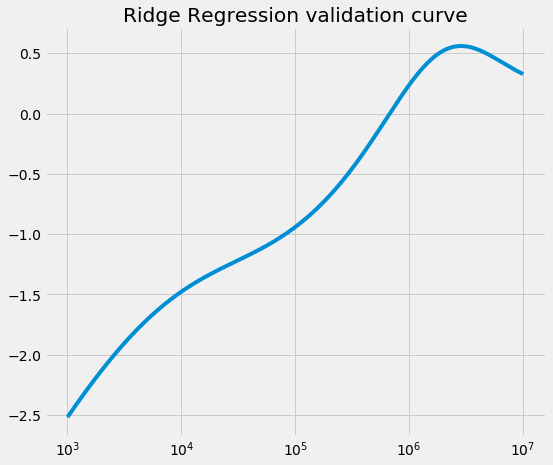

In [75]:
plt.figure(figsize=(8,7))
plt.title("Ridge Regression validation curve")
plt.plot(ridge_alphas, result)
plt.xscale("log")

In [69]:
data = dict(zip(ridge_alphas,result))

In [73]:
import operator
max(data.items(), key=operator.itemgetter(1))[0]

2866067.6169482502

In [76]:
data[2866067.6169482502]

0.5594500111143883

Lasso

In [80]:
#Alpha values for lasso model
lasso_alphas = np.linspace(25, 160, 80)
lasso_alphas

array([  25.        ,   26.70886076,   28.41772152,   30.12658228,
         31.83544304,   33.5443038 ,   35.25316456,   36.96202532,
         38.67088608,   40.37974684,   42.08860759,   43.79746835,
         45.50632911,   47.21518987,   48.92405063,   50.63291139,
         52.34177215,   54.05063291,   55.75949367,   57.46835443,
         59.17721519,   60.88607595,   62.59493671,   64.30379747,
         66.01265823,   67.72151899,   69.43037975,   71.13924051,
         72.84810127,   74.55696203,   76.26582278,   77.97468354,
         79.6835443 ,   81.39240506,   83.10126582,   84.81012658,
         86.51898734,   88.2278481 ,   89.93670886,   91.64556962,
         93.35443038,   95.06329114,   96.7721519 ,   98.48101266,
        100.18987342,  101.89873418,  103.60759494,  105.3164557 ,
        107.02531646,  108.73417722,  110.44303797,  112.15189873,
        113.86075949,  115.56962025,  117.27848101,  118.98734177,
        120.69620253,  122.40506329,  124.11392405,  125.82278

In [82]:
import warnings

In [ ]:
warnings.filters

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

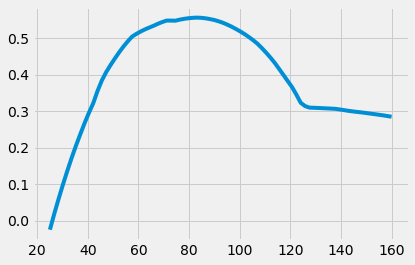

In [84]:
#Lasso
result1 = []
for i in lasso_alphas:
    r_score = cross_val_score(Lasso(alpha = i),Xp,y,cv=5,scoring="r2").mean()
    result1.append(r_score)

plt.plot(lasso_alphas,result1)


## Regularized Polynomial Regression cont.

We're going to continue our lesson regularized polynomial regression by modeling higher degree data.

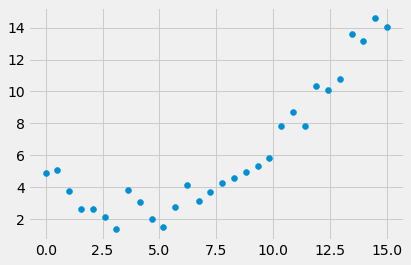

In [85]:
#Create random data and pass it into function
func = lambda x: 1 + .1 * (x - 4) ** 2 + 4 * np.random.random(len(x))
N, n = 1000, 30
domain = np.linspace(0, 15, N)
x_sample = np.linspace(0, 15, n)
y_sample = func(x_sample)
#Plot random data
plt.scatter(x_sample, y_sample)

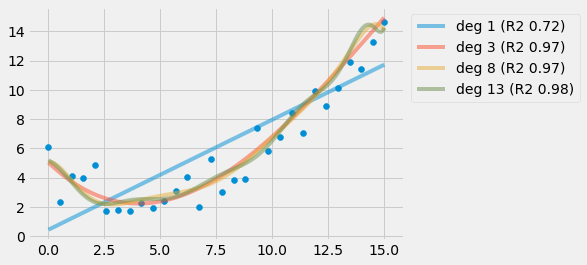

In [88]:
#Another way to reshape data
X = np.array([x_sample]).T
for degree in [1, 3, 8, 13]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y_sample)
    y_pred = model.predict(np.array([domain]).T)
    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X, y_sample)))

plt.scatter(x_sample, func(x_sample))
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

Cross validation time

For degree 1 , R2 = 0.578929263235
For degree 2 , R2 = 0.925311202479
For degree 3 , R2 = 0.941095246192
For degree 4 , R2 = 0.900156281583
For degree 5 , R2 = 0.941900969677


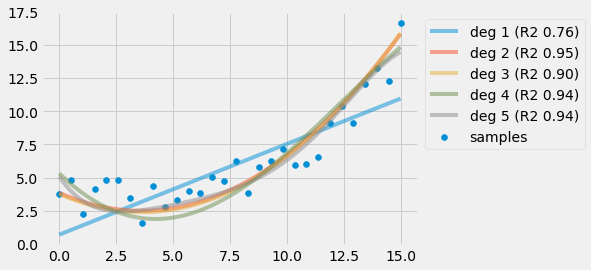

In [87]:
plt.scatter(x_sample, func(x_sample), label="samples")
for degree in [1, 2, 3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # Compute a few R2 scores and print average performance
    scores = []
    for k in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y_sample, train_size=.7)
        scores.append(model.fit(X_train, y_train).score(X_test, y_test))
    print ("For degree", degree, ", R2 =", np.mean(scores))
    # Take last model to plot predictions
    y_pred = model.predict(np.array([domain]).T)
    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X_test, y_test)))

    plt.legend(loc="upper left", bbox_to_anchor=(1,1))

Function for cross validating various polynomial values

In [89]:
def analyze_performance(test_model, X, y_sample):
    scores = {'overfit': {}, 'cv': {}}
    for degree in range(1, 20):
        model = make_pipeline(PolynomialFeatures(degree), test_model)    
        scores['overfit'][degree] = model.fit(X, y_sample).score(X, y_sample)
        cv_scores = []
        for k in range(5):  # Compute a few R2 scores and print average performance
            X_train, X_test, y_train, y_test = train_test_split(X, y_sample, train_size=.7)
            cv_scores.append(model.fit(X_train, y_train).score(X_test, y_test))
        scores['cv'][degree] = np.mean(cv_scores)
    return pd.DataFrame(scores)

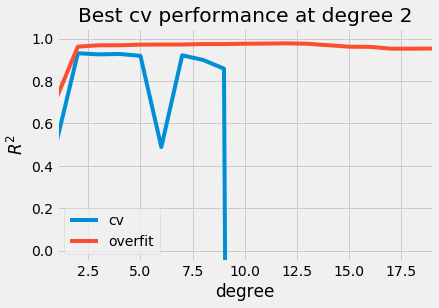

In [90]:
#Pass in empty linear regression and X and y_sample
scores = analyze_performance(LinearRegression(), X, y_sample)
scores.plot(ylim=(-.05,1.05))
plt.title("Best cv performance at degree %d" % scores.cv.argmax()), plt.xlabel('degree'), plt.ylabel('$R^2$');

Don't run this code!

In [ ]:
x_small_sample = x_sample[::4]
y_small_sample = func(x_small_sample)

degree, alpha = 4, 10

X = np.array([x_small_sample]).T
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
m = ["Linear", "Ridge", "Lasso"]
for no, my_model in enumerate([LinearRegression(), Ridge(alpha=alpha), Lasso(alpha=alpha)]):    
    model = make_pipeline(PolynomialFeatures(degree), my_model)    
    r2, MSE = [], []
    for k in range(40):  # Fit a few times the model to different training sets
        X_train, X_test, y_train, y_test = train_test_split(X, y_small_sample, train_size=.7)
        r2.append(model.fit(X_train, y_train).score(X_test, y_test))
        y_pred = model.predict(np.array([domain]).T)
        axes[no].plot(domain, y_pred, alpha=.3)
        y_pred_sample = model.predict(np.array([x_small_sample]).T)
        MSE.append(np.square(y_pred_sample - y_small_sample).sum())
    axes[no].scatter(x_small_sample, y_small_sample, s=70)
    axes[no].set_title("%s  MSE %3d)" % (m[no], np.mean(MSE)))
    axes[no].set_xlim(-.2, max(domain)), axes[no].set_ylim(-1, 21)

![a](lin_ridge_lasso.png)

- The unregularized `LinearRegression` leads to a model that is too complex and tries to fit the noise. 
- Note the differences in the (averaged) mean square error, or MSE, as well the complexity in the plots

Let's incorpoate polynomial degrees a few degrees with the regularized models.

In [93]:
test_models = [LinearRegression(), Ridge(alpha=10), Lasso(alpha=10)]

scores = [analyze_performance(my_model, X, y_sample) for my_model in test_models]

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.0064455002042807e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 8.56322014893955e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 6.647023178361921e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/scip

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

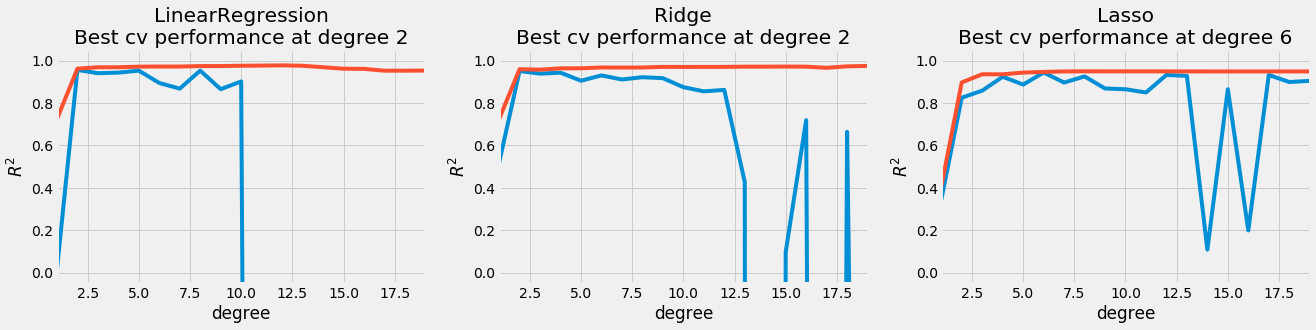

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
for no, score in enumerate(scores):
    s, name = pd.DataFrame(score), test_models[no].__class__.__name__
    f = s.plot(ylim=(-.05,1.05), ax=axes[no], legend=False)
    f = axes[no].set_title("%s\nBest cv performance at degree %d" % (name, s.cv.argmax()))
    f = axes[no].set_xlabel('degree'), axes[no].set_ylabel('$R^2$')

Let's try a few different values for $\alpha$ as well.

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.0064455002042807e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.776911193821916e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.8095186047079545e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sc

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: R

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

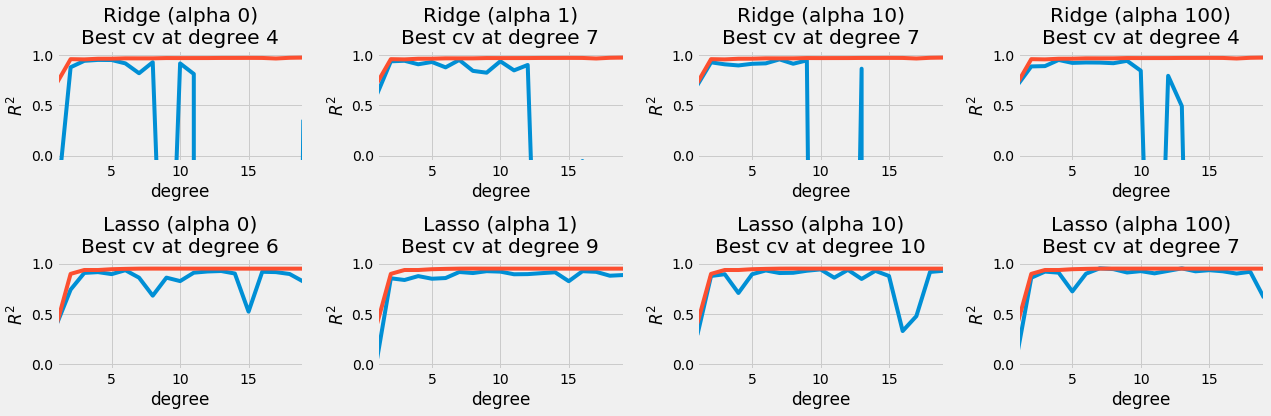

In [95]:
fig, axes = plt.subplots(2, 4, figsize=(18, 6))
test_models = test_models[1:]
for col, alpha in enumerate([0, 1, 10, 100]):
    scores = [analyze_performance(my_model, X, y_sample) for my_model in test_models]
    for row, score in enumerate(scores):
        s, name = pd.DataFrame(score), test_models[row].__class__.__name__
        f = s.plot(ylim=(-.05,1.05), ax=axes[row, col], legend=False)
        f = axes[row, col].set_title("%s (alpha %d)\nBest cv at degree %d" % (name, alpha, s.cv.argmax()))
        f = axes[row, col].set_xlabel('degree'), axes[row, col].set_ylabel('$R^2$')
plt.tight_layout()


### Resources:

- https://www.theanalysisfactor.com/regression-modelshow-do-you-know-you-need-a-polynomial/
- http://connor-johnson.com/2014/02/18/linear-regression-with-python/
- http://blog.minitab.com/blog/adventures-in-statistics-2/curve-fitting-with-linear-and-nonlinear-regression
- https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
- https://www.youtube.com/watch?v=nmHNXsDPPFQ
- https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html
- https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/
- http://setosa.io/ev/ordinary-least-squares-regression/
- https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/
- http://www.few.vu.nl/~wvanwie/Courses/HighdimensionalDataAnalysis/WNvanWieringen_HDDA_Lecture23_RidgeRegression_20172018.pdf

### Class work


For the rest of class, work on modeling the King County housing dataset using the models and techniques we've covered in this class. Find out if lasso and ridge regressions can give us a better model with this dataset.

In [98]:
kc = pd.read_csv("../../data/kc_house_data.csv")


In [99]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [102]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [103]:
kc.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [104]:
kc_copy = kc.drop(["id","date"],axis=1)

In [105]:
X = kc_copy.drop("price",axis=1)
y = kc_copy.price

In [ ]:
X_class = [6 features]

In [ ]:
pipe = make_pipeline(PolynomialFeatures(3),Ridge(2000))

In [106]:
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.6997471890109157

In [108]:
rid = Ridge(alpha = 100)
rid.fit(X,y)
rid.score(X,y)

0.69440336437768457

In [109]:
las = Lasso(alpha=1)
las.fit(X,y)
las.score(X,y)

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.69974718673438119

In [112]:
coeff = las.coef_
coeff

array([ -3.57654857e+04,   4.11409378e+04,   2.84817436e+02,
         1.28560052e-01,   6.68852350e+03,   5.82808978e+05,
         5.28760563e+04,   2.63822215e+04,   9.58931043e+04,
        -1.03588787e+02,  -1.34711666e+02,  -2.62035150e+03,
         1.98135374e+01,  -5.82281057e+02,   6.02683458e+05,
        -2.14640356e+05,   2.16785125e+01,  -3.82690890e-01])

In [114]:
z = dict(zip(X,coeff))
z

{'bathrooms': 41140.937770092722,
 'bedrooms': -35765.485718297219,
 'condition': 26382.221548817652,
 'floors': 6688.5235008065356,
 'grade': 95893.104326838395,
 'lat': 602683.4577363854,
 'long': -214640.35624308622,
 'sqft_above': -103.58878665623919,
 'sqft_basement': -134.7116655006653,
 'sqft_living': 284.81743564790077,
 'sqft_living15': 21.678512470724392,
 'sqft_lot': 0.12856005241444698,
 'sqft_lot15': -0.38269089043309656,
 'view': 52876.056266809544,
 'waterfront': 582808.97821378091,
 'yr_built': -2620.3514985227293,
 'yr_renovated': 19.813537355864447,
 'zipcode': -582.28105688676942}

In [132]:
import operator
max(z.items(), key=operator.itemgetter(1))[0]

'lat'

In [117]:
cross_val_score(LinearRegression(),X,y,cv=5,scoring="r2").mean()

0.69459082832833707

In [118]:
cross_val_score(Ridge(100),X,y,cv=5,scoring="r2").mean()

0.68765119934310182

In [119]:
cross_val_score(Lasso(1),X,y,cv=5,scoring="r2").mean()

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

0.69459075978451135

In [129]:
from sklearn.metrics import mean_squared_error

In [130]:
np.mean((-cross_val_score(Ridge(100),X,y,cv=5,scoring="neg_mean_squared_error"))**.5)

204852.79389881823

In [141]:
np.mean((-cross_val_score(LinearRegression(),X,y,cv=5,scoring="neg_mean_squared_error"))**.5)

202532.9189364558

In [142]:
np.mean((-cross_val_score(Lasso(1),X,y,cv=5,scoring="neg_mean_squared_error"))**.5)

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

202532.96697386005

In [133]:
poly = PolynomialFeatures(degree=2)
Xp = poly.fit_transform(X)

In [134]:
lr = LinearRegression()
lr.fit(Xp,y)
lr.score(Xp,y)

0.82879307624140119

In [135]:
rid = Ridge(alpha=100)
rid.fit(Xp,y)
rid.score(Xp,y)

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.2755029326576688e-20
  ' condition number: {}'.format(rcond), RuntimeWarning)


0.81266425479340643

In [136]:
las = Lasso(alpha = 1)
las.fit(Xp,y)
las.score(Xp,y)

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.78491493565192039

In [138]:
np.mean((-cross_val_score(LinearRegression(),Xp,y,cv=5,scoring="neg_mean_squared_error"))**0.5)

158276.17088282888

In [139]:
np.mean((-cross_val_score(Ridge(100),Xp,y,cv=5,scoring="neg_mean_squared_error"))**0.5)

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.797195527986953e-23
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.734319461692707e-20
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.163670628295026e-22
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/scip

165563.77038096651

In [140]:
np.mean((-cross_val_score(Lasso(1),Xp,y,cv=5,scoring="neg_mean_squared_error"))**0.5)

/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishashah/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordin

177683.32341923477